In [27]:
import pandas as pd
import numpy as np
import matplotlib, nltk, seaborn, sklearn, gensim, pyLDAvis, wordcloud, textblob, spacy, textstat




#file and its location
file = ('C:\\Users\\mjjyo\\OneDrive\\Desktop\\openavenuesmicrointernship\\open_ave_data.csv')

In [28]:
#setting data to a variable
medicalData = pd.read_csv(file)

In [29]:
medicalData

,Unnamed: 0,ReportText,findings,clinicaldata,ExamName,impression
0,0,EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/01/2019 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: Cough. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/01/2019 ...,IMPRESSION: Normal 2-view chest radiography.
1,1,EXAM: CHEST RADIOGRAPHY EXAM DATE: 05/23/2020 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: CHEST PAIN. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 05/23/2020 ...,IMPRESSION: No acute cardiopulmonary abnormali...
2,2,EXAM: CHEST RADIOGRAPHY EXAM DATE: 12/13/2019 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: CHEST PAIN. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 12/13/2019 ...,IMPRESSION: No acute cardiopulmonary process.
3,3,Exam: - CHEST-PORTABLE History: Chest pain Com...,Findings: Heart size appears normal. Lungs cle...,History: Chest pain \n\n,Exam: - CHEST-PORTABLE\n\nComparison: None,Impression: Lungs clear
4,4,EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/17/2021 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,"CLINICAL HISTORY: CHEST PAIN, SHORTNESS OF BRE...",EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/17/2021 ...,IMPRESSION: Normal single view chest.
...,...,...,...,...,...,...
949,982,CHEST RADIOGRAPH: PA and Lateral views HISTORY...,LUNGS: The lung fields demonstrate normal degr...,HISTORY: R05 Cough \n\n,CHEST RADIOGRAPH: PA and Lateral views\n\nCOMP...,IMPRESSION: No acute pulmonary disease.
950,983,EXAM DESCRIPTION: X-ray single view chest. CLI...,FINDINGS: The lungs are well expanded and are ...,"CLINICAL HISTORY: 68 years Male, SOB \n\n",EXAM DESCRIPTION: X-ray single view chest.\n\n...,IMPRESSION: No evidence of acute intrathoracic...
951,984,EXAM: CHEST RADIOGRAPHY EXAM DATE: 04/02/2018 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: Chest pain. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 04/02/2018 ...,IMPRESSION: Normal single view chest.
952,985,EXAM: XR CHEST 1 VW HISTORY: chest pain TECHNI...,FINDINGS: Lines and tubes: None Cardiomediasti...,HISTORY: chest pain \n\n,EXAM: XR CHEST 1 VW\n\nTECHNIQUE: Chest AP vie...,IMPRESSION: No acute cardiopulmonary process D...


# Histogram of text length

Text(0, 0.5, 'Count')

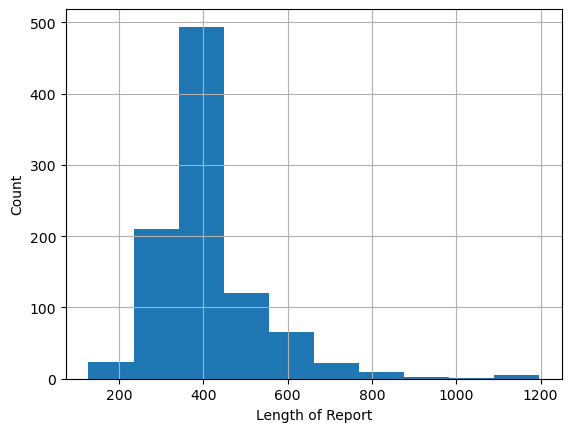

In [30]:
#histogram of text length of Report Text
text_hist = medicalData['ReportText'].str.len().hist()
text_hist.set_xlabel('Length of Report')
text_hist.set_ylabel('Count')

# Histogram of Number of Words

Text(0, 0.5, 'Count')

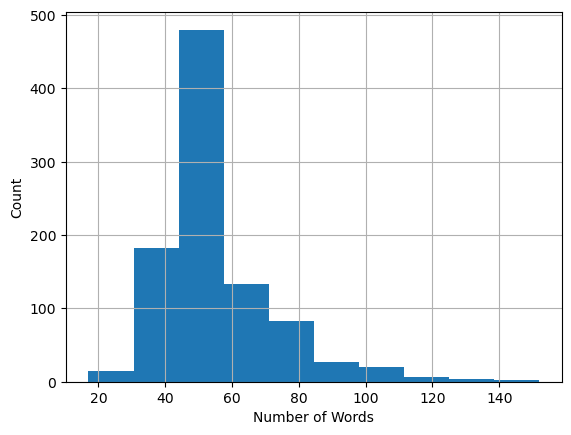

In [31]:
# def number_of_words(text):
#     text.str.split().\
#         map(lambda x:len(x)).\

# number_of_words(medicalData['ReportText'])
    
num_words = medicalData['ReportText'].str.split().map(lambda x:len(x)).hist()
num_words.set_xlabel('Number of Words')
num_words.set_ylabel('Count')

# Histogram of  average word length

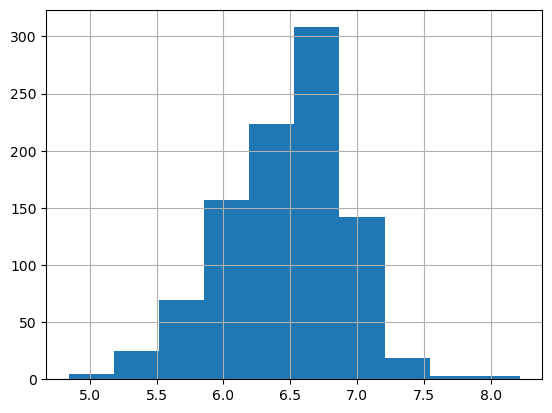

In [32]:
def average_word_length(text):
    text.str.split().\
        apply(lambda x: [len(i) for i in x]).\
        map(lambda x: np.mean(x)).hist()
    
averages = average_word_length(medicalData['ReportText'])

# Stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mjjyo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<BarContainer object of 10 artists>

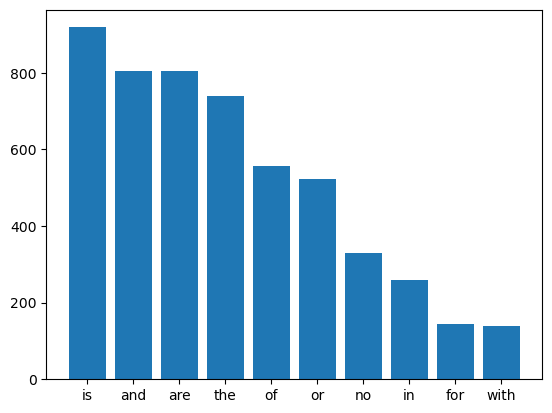

In [33]:
#analyzing effect of stopwords
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

#downloading common stopwords
nltk.download('stopwords')
stop = set(stopwords.words('english'))

#creating corpus
corpus = []

new = medicalData['ReportText'].str.split()
new = new.values.tolist()

corpus = [word for i in new for word in i]

from collections import defaultdict
dic = defaultdict(int)

for word in corpus:
    #if word is a stop word
    if word in stop:
        dic[word]+= 1
        
#showing a histogram of stop words
top = sorted(dic.items(), key = lambda x:x[1], reverse = True)[:10]
x, y = zip(*top)
plt.bar(x,y)

# Words outside of stopwords

<AxesSubplot:>

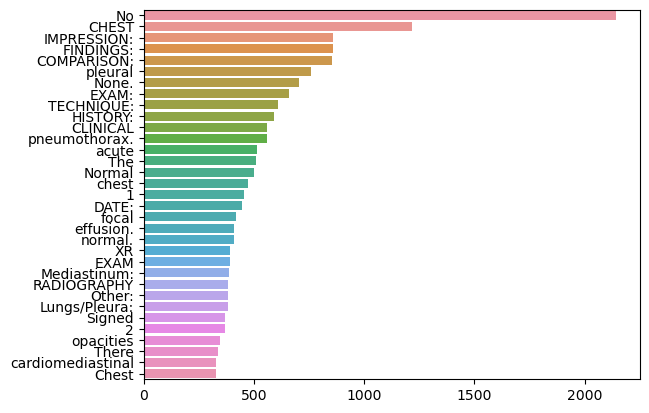

In [34]:
# Inspect which words other than these stopwords occur
from collections import Counter
import seaborn as sns

counter = Counter(corpus)
most = counter.most_common()

x, y = [], []
for word, count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y, y=x)

# N gram exploration

<AxesSubplot:>

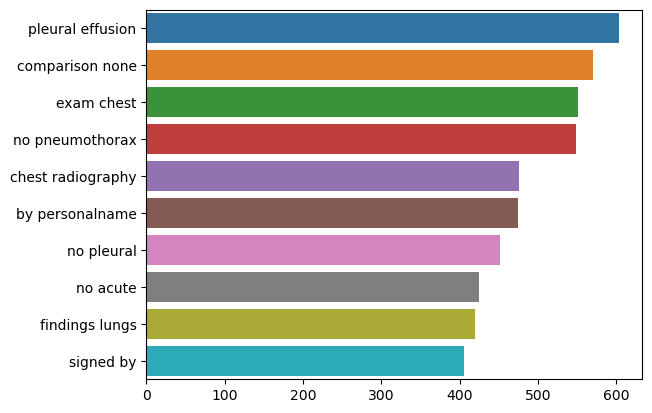

In [35]:
#general function for getting ngram
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer


def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                 for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    
    return words_freq[:10]

#Creating bigrams
top_n_bigrams = get_top_ngram(medicalData['ReportText'], 2)[:10]
x, y = map(list, zip(*top_n_bigrams))
sns.barplot(x=y, y=x)




<AxesSubplot:>

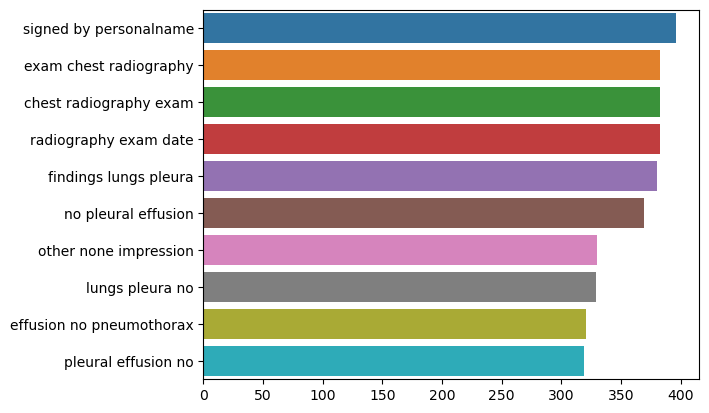

In [36]:
#Creating trigrams
top_n_trigrams = get_top_ngram(medicalData['ReportText'], 3)[:10]
x, y = map(list, zip(*top_n_trigrams))
sns.barplot(x=y, y=x)


# Topic modeling exploration 

In [37]:
import nltk
nltk.download('omw-1.4')
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize


nltk.download('punkt')
nltk.download('wordnet')

def preprocess_report(df):
    corpus = []
    stem = PorterStemmer()
    lem = WordNetLemmatizer()
    for text in df['ReportText']:
        words = [w for w in word_tokenize(text) if (w not in stop)]
        
        words = [lem.lemmatize(w) for w in words if len(w) > 2]
        
        corpus.append(words)
    return corpus

corpus = preprocess_report(medicalData)


#creating the bag of words model using gensim

dic = gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]
#create lda model
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                      num_topics = 5,
                                      id2word = dic,
                                      passes = 10,
                                      workers = 2)

lda_model.show_topics()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mjjyo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mjjyo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mjjyo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[(0,
  '0.052*"EXAM" + 0.041*"None" + 0.038*"view" + 0.037*"CHEST" + 0.029*"Normal" + 0.027*"HISTORY" + 0.026*"Mediastinum" + 0.026*"TECHNIQUE" + 0.026*"RADIOGRAPHY" + 0.026*"Lungs/Pleura"'),
 (1,
  '0.027*"tube" + 0.021*"CHEST" + 0.015*"stable" + 0.014*"left" + 0.014*"tip" + 0.013*"PERSONALNAME" + 0.012*"pneumothorax" + 0.012*"EXAM" + 0.012*"Stable" + 0.011*"right"'),
 (2,
  '0.032*"Normal" + 0.022*"pulmonary" + 0.017*"FINDINGS" + 0.016*"abnormality" + 0.016*"COMPARISON" + 0.015*"acute" + 0.013*"CHEST" + 0.012*"cough" + 0.012*"None" + 0.011*"IMPRESSION"'),
 (3,
  '0.036*"acute" + 0.025*"chest" + 0.022*"normal" + 0.022*"There" + 0.021*"effusion" + 0.020*"IMPRESSION" + 0.020*"CHEST" + 0.020*"The" + 0.020*"FINDINGS" + 0.020*"COMPARISON"'),
 (4,
  '0.037*"CHEST" + 0.029*"The" + 0.029*"normal" + 0.027*"PERSONALNAME" + 0.023*"IMPRESSION" + 0.022*"Signed" + 0.022*"COMPARISON" + 0.022*"FINDINGS" + 0.021*"chest" + 0.020*"lung"')]

In [38]:
#Visualize results of LDA 
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, bow_corpus, dic)
vis

C:\Users\mjjyo\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.216104  0.046648       1        1  33.248326
3     -0.009710 -0.054681       2        1  25.864962
4     -0.038166 -0.072932       3        1  21.468431
1      0.117871  0.179309       4        1  13.197340
2      0.146109 -0.098344       5        1   6.220940, topic_info=          Term        Freq       Total Category  logprob  loglift
16      Normal  540.000000  540.000000  Default  30.0000  30.0000
44       acute  484.000000  484.000000  Default  29.0000  29.0000
127        The  466.000000  466.000000  Default  28.0000  28.0000
23     evident  319.000000  319.000000  Default  27.0000  27.0000
164       tube  156.000000  156.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
10     HISTORY   21.738500  581.657300   Topic5  -4.7307  -0.5095
22    effusion   19.342547  729.296389   Topic5  -4.8475  -0.8525
128    cardiac   14.728375   60.036842   Topic5  -5.1200   1.3721
19   TECHNIQUE   16.470293  590.969860   Topic5  -5.0082  -0.8030
61       Chest   14.569389  323.795485   Topic5  -5.1308  -0.3239

[359 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1131      1  0.767425       01:13
932       1  0.768092  03/04/2020
1         1  0.767203       08:30
1508      1  0.767229       08:45
120       1  0.768680  09/05/2019
...     ...       ...         ...
220       1  0.011059      within
220       2  0.558462      within
220       3  0.381524      within
220       4  0.044235      within
220       5  0.005529      within

[660 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 5, 2, 3])

# Wordclouds

C:\Users\mjjyo\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\mjjyo\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\mjjyo\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\mjjyo\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

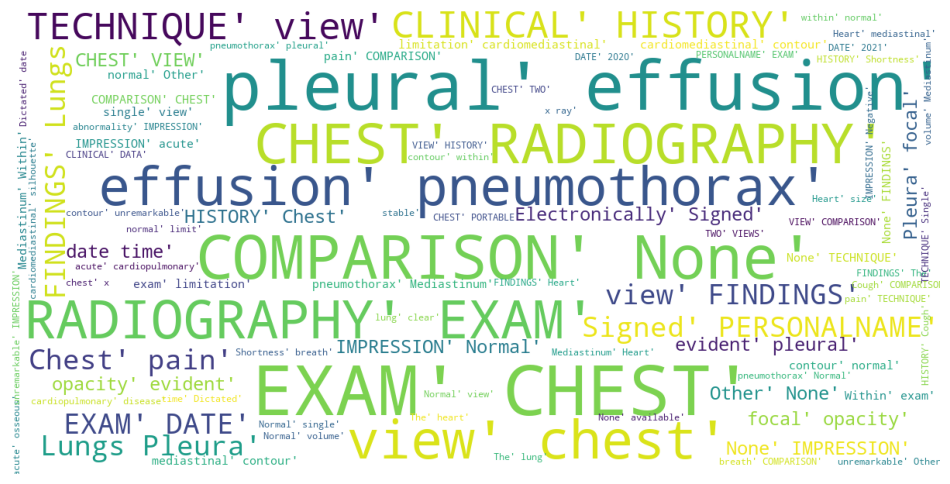

In [39]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color = 'white',
        stopwords = stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1
    )
    
    wordcloud = wordcloud.generate(str(data))
    
    fig = plt.figure(1, figsize=(12,12))
    plt.axis('off')
    
    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(corpus)

# Speech tagging in Python


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mjjyo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


<AxesSubplot:>

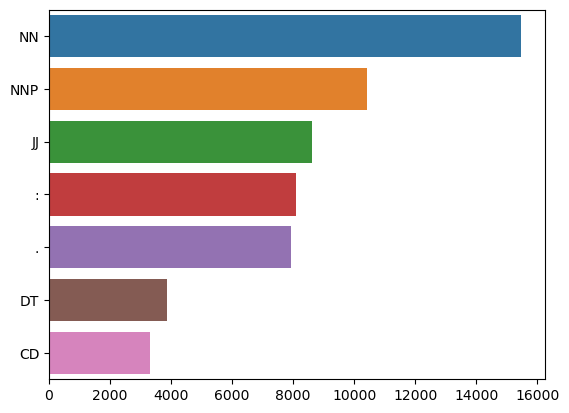

In [40]:
nltk.download('averaged_perceptron_tagger')

def pos(text):
    pos = nltk.pos_tag(word_tokenize(text))
    pos = list(map(list, zip(*pos)))[1]
    return pos

tags = medicalData['ReportText'].apply(lambda x : pos(x))

tags = [x for l in tags for x in l]
counter = Counter(tags)

x, y = list(map(list,zip(*counter.most_common(7))))
sns.barplot(x=y, y=x)


<AxesSubplot:>

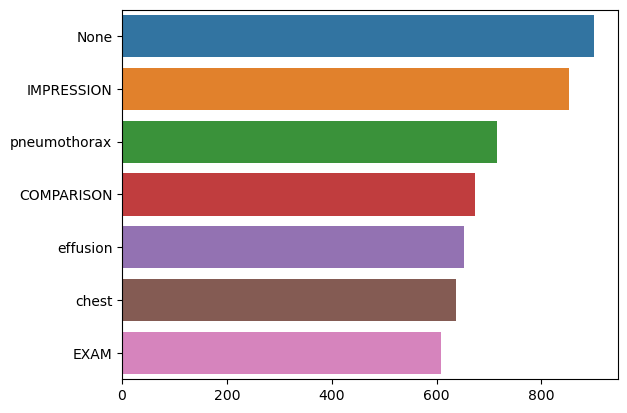

In [41]:
#Find nouns that most commonly occur
def get_adjs(text):
    adj = []
    pos = nltk.pos_tag(word_tokenize(text))
    for word,tag in pos:
        if tag == 'NN':
            adj.append(word)
    return adj

words = medicalData['ReportText'].apply(lambda x: get_adjs(x))
words = [x for l in words for x in l]
counter = Counter(words)

x, y = list(map(list, zip(*counter.most_common(7))))
sns.barplot(x=y, y=x)

# Text complexity


<AxesSubplot:>

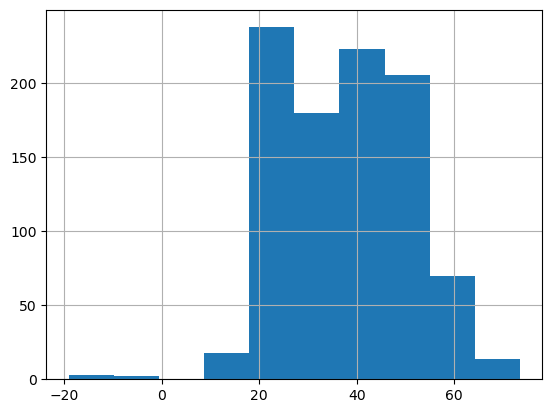

In [42]:
from textstat import flesch_reading_ease

reading = medicalData['ReportText'].\
    apply(lambda x : flesch_reading_ease(x))
reading.hist()

In [43]:
#checking the report texts w/ a readibility score below 5 (hardest to read)
x = [i for i in range(len(reading)) if reading[i] < 5]
medicalData.iloc[x]['ReportText'].head()

98     CHEST 1 VIEW INDICATION / CLINICAL INFORMATION...
243    EXAM: XR CHEST 2 VW HISTORY: Cough TECHNIQUE: ...
304    EXAM: XR CHEST 2 VW HISTORY: Cough TECHNIQUE: ...
722    EXAM: XR CHEST 1 VW HISTORY: Chest pain TECHNI...
829    EXAM: XR CHEST 1 VW HISTORY: chest pain TECHNI...
Name: ReportText, dtype: object

In [44]:
#showing full text of one of the examples
medicalData.iloc[98]['ReportText']

'CHEST 1 VIEW INDICATION / CLINICAL INFORMATION: Respiratory distress/disease. COMPARISON: None available. FINDINGS: SUPPORT DEVICES: Right-sided central venous line projects over the superior vena cava. HEART / MEDIASTINUM: No significant abnormality. LUNGS / PLEURA: There is extensive bilateral pulmonary consolidation. No pneumothorax. ADDITIONAL FINDINGS: No significant additional findings. IMPRESSION: 1. Extensive bilateral pulmonary consolidation. Signer Name: [[PERSONALNAME]] MD Signed: 04/07/2020 7:16 PM Workstation Name: [[PERSONALNAME]]'

# Finding other ways to visualize data:

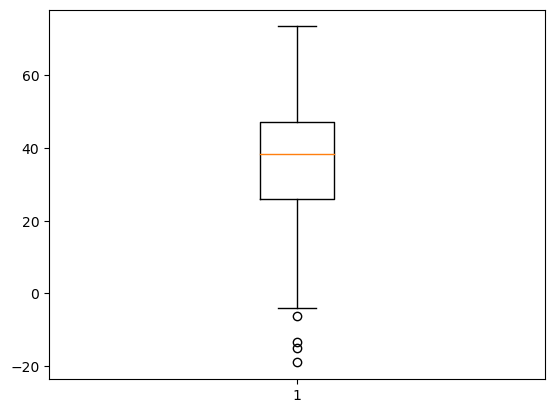

In [45]:
#Boxplot of reading level
import matplotlib.pyplot as plt
box = plt.boxplot(x=reading)

# Seeing if there is a correlation between complex words, number of words, and length of words in Report Text


In [46]:
data = {}
df = pd.DataFrame(data)

length_of_words = medicalData['ReportText'].str.split().\
    apply(lambda x: [len(i) for i in x]).\
    map(lambda x: np.mean(x))

num_of_words = medicalData['ReportText'].str.split().\
        map(lambda x:len(x))

df['Complexity'] = reading
df['Length of Words'] = length_of_words
df['Number of Words'] = num_of_words

In [47]:
df

,Complexity,Length of Words,Number of Words
0,22.98,7.023256,43
1,31.24,6.526316,57
2,47.96,6.480769,52
3,45.93,6.444444,18
4,39.40,6.528302,53
...,...,...,...
949,56.42,6.065934,91
950,54.49,5.826087,92
951,22.78,6.795455,44
952,14.36,7.095890,146


<AxesSubplot:>

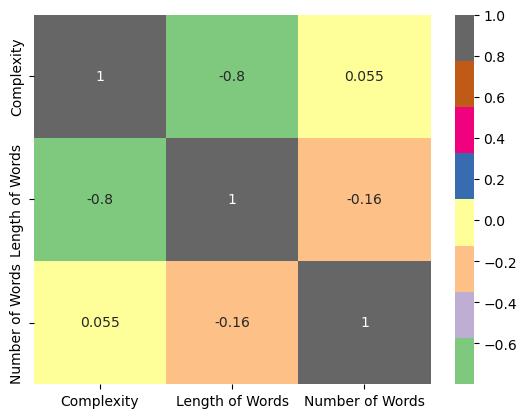

In [48]:
sns.heatmap(df.corr(), annot=True, cmap='Accent')

<AxesSubplot:xlabel='Length of Words', ylabel='Complexity'>

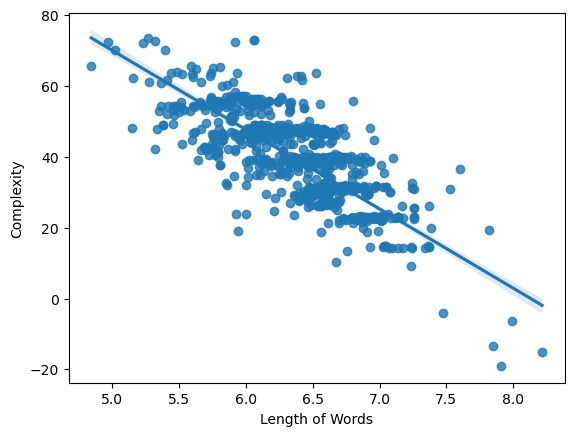

In [49]:
sns.regplot(x='Length of Words', y='Complexity', data = df)

What we can conclude from this EDA (in total) is that a huge part of these Radiologies include mentions of chests, lungs, lung issues, and impressions in the chest. We also can tell that the reading level of these reports is pretty high level, that the longer the words are it is likely the more complex they are. 

We can understand more about the dataset and the values inside of it. There are some issues with 'Personal Name' and 'None' being high value options, so we should change it so that those are also stop words